# 第二次作业

In [2]:
%matplotlib inline

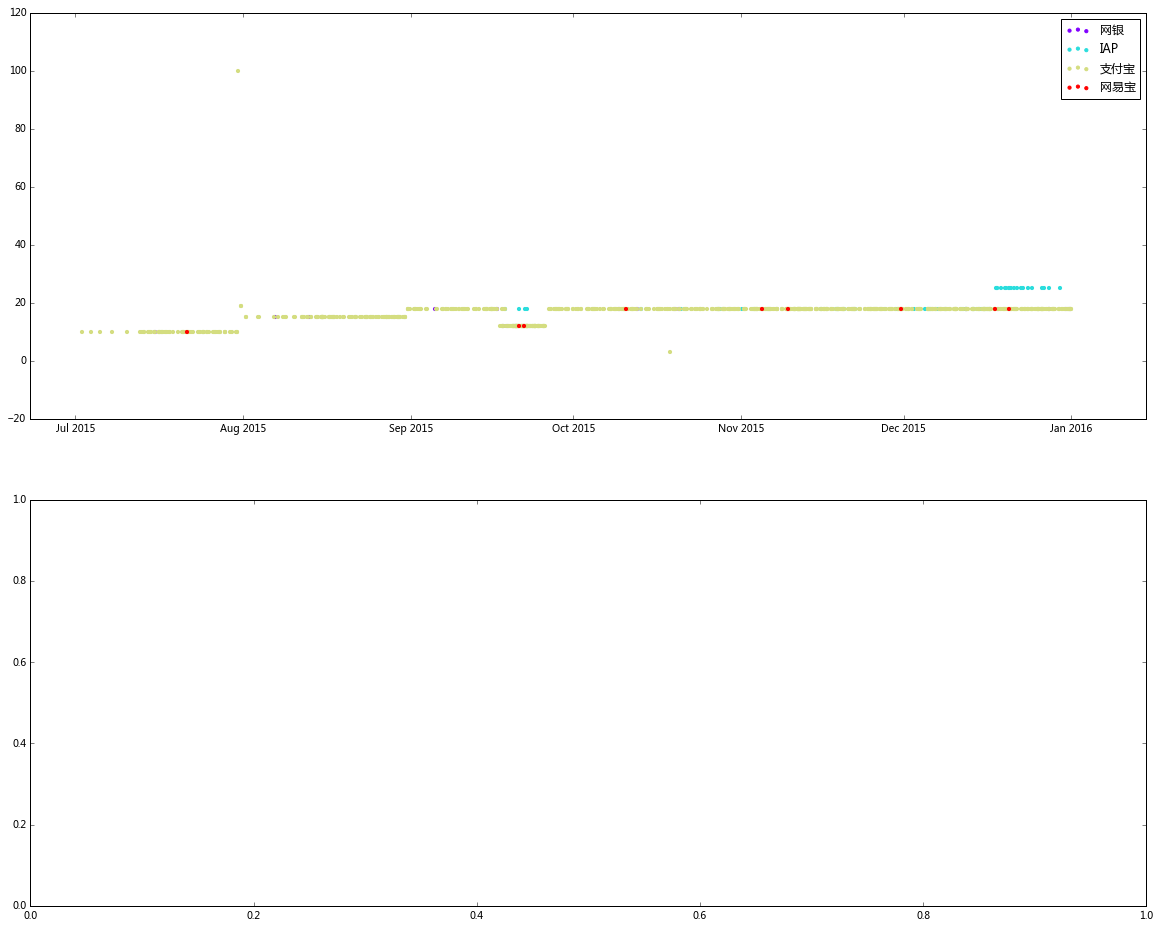

In [19]:
# -*- coding: utf-8 -*-

'''
Created on 2016年4月24日
@author: todoit
'''
import csv
from datetime import datetime
import os

os.chdir("E:\\workspace_python\\PythonNote\\src\\todoit\\MatPlot") # 改变目录，注意双引号和反斜杠

#将文件读到dict的list中
def readOrders(file_name): 
    orders_data = [] 
    #时间格式
    time_str = '%m/%d/%Y %H:%M'
    with open(file_name,'r') as f:
        f_reader = csv.reader(f)
        #跳过第一行
        headings = next(f_reader)
        for row in f_reader:
            order={}
            order['id'] = row[0]
            order['money'] = float(row[1])
            order['channel'] = row[2]
            order['datetime'] = datetime.strptime(row[3], time_str)
            
            orders_data.append(order)
    return orders_data

#订单分析
def userAnalysis(orders_data):
    from matplotlib import pyplot as plt
    import numpy as np
    
    
    fig,(ax0,ax1,ax2, ax3)=plt.subplots(nrows=3, figsize=(9,6))
    
    #用户增长趋势分析，用line
    orders_date_list = [order['datetime'].date() for order in orders_data]
    ax0.hist(orders_date_list, len(set(orders_date_list)), normed=0, histtype='bar', facecolor='g', alpha=0.75,cumulative=True)
    
    #分析用户购买时间，按照星期分析
    orders_week_list = [order['datetime'].weekday()+1 for order in orders_data]
    ax1.hist(orders_week_list, len(set(orders_week_list)), normed=0, histtype='bar', facecolor='g', alpha=0.75)
    #按照每天的时间进行分析
    orders_hour_list = [order['datetime'].hour for order in orders_data]
    ax2.hist(orders_hour_list, len(set(orders_hour_list)), normed=0, histtype='bar', facecolor='g', alpha=0.75)
    
    
    plt.show()

# 课程分析
def courseAnalysis(orders_data):
    from matplotlib import pyplot as plt
    import numpy as np
    import matplotlib.cm as cm
    import itertools
    
    fig,(ax0,ax1)=plt.subplots(nrows=2, figsize=(20,16))
    
    #分析价格随时间变化趋势
    #价格变化趋势分析，对每种支付方式分别分析，看是否针对不同的支付方式有不同的价格
    #得到支付方式列表
    channels = set(order['channel'] for order in orders_data)
    colors =   iter(cm.rainbow(np.linspace(0, 1, len(channels))))
    for channel in channels:
        date_list = [order['datetime'] for order in orders_data if order['channel']==channel]
        price_list = [order['money'] for order in orders_data if order['channel']==channel]
        ax0.scatter(date_list,price_list,label=channel,s=10,color=next(colors))
        ax0.legend()
    
    plt.show()
    #每个月的收入分析
    

if __name__ == '__main__':
    orders_data = readOrders("OutOrder.csv")
    courseAnalysis(orders_data)
    
    
    
    
    
    




